In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotnine as p9
data = pd.read_csv("exercise.csv")

In [2]:
data_to_learn = data[0:40].copy()
data_to_predict = data[40:60].copy()
data_to_learn.head()

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68


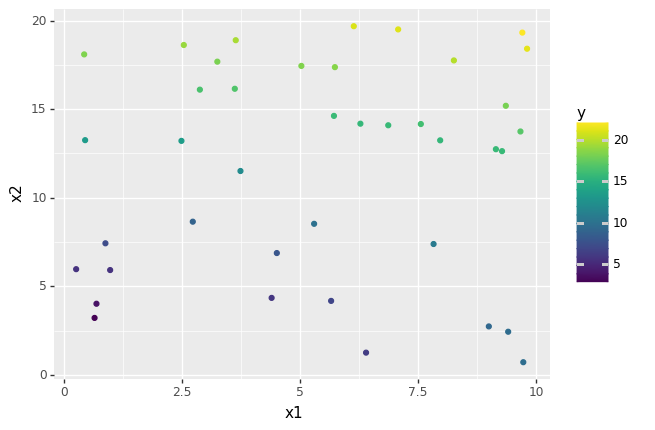

<ggplot: (8732965028809)>

In [3]:
fig_1=(p9.ggplot(p9.aes(x='x1',y='x2',color='y'),data=data_to_learn)
      +p9.geom_point())
fig_1

#### Z powyzszego pogladowego wykresu wynika ze im wieksze x1 i x2 tym wieksze y

In [4]:
model = smf.ols('y ~ x1+x2', data=data_to_learn).fit()
outcome=model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        00:34:22   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
data_to_learn['y_pred']=model.predict()
data_to_learn['residuals']=data_to_learn['y']-data_to_learn['y_pred']

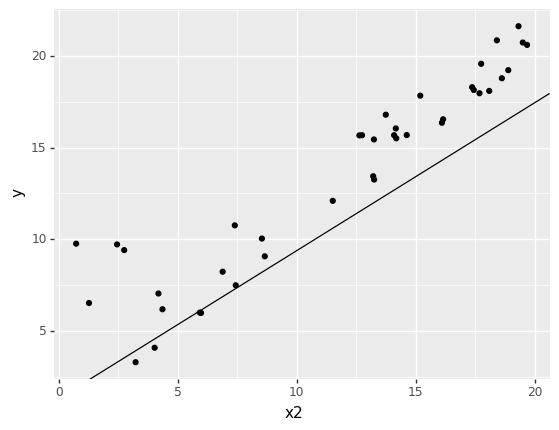

<ggplot: (8732960516221)>

In [6]:
fig=(p9.ggplot(p9.aes(x='x2',y='y'),data=data_to_learn)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome['Intercept'],slope=outcome['x2'])))
fig

#### Silna korelacja miedzy y a x2

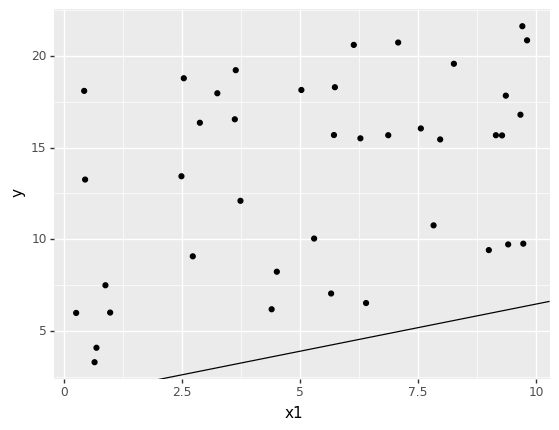

<ggplot: (8732960523581)>

In [7]:
fig2=(p9.ggplot(p9.aes(x='x1',y='y'),data=data_to_learn)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome['Intercept'],slope=outcome['x1'])))
fig2

#### Silna korelacja miedzy y a x2

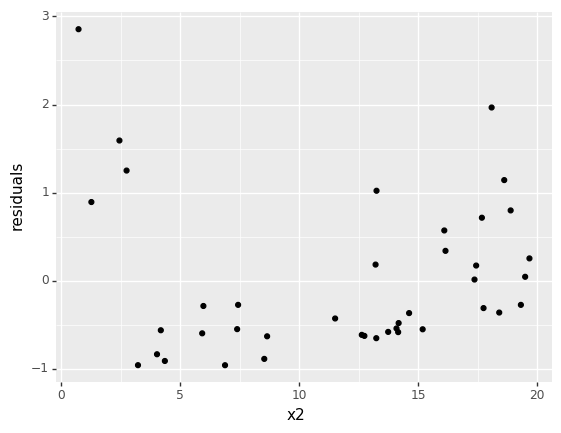

<ggplot: (8732960492353)>

In [8]:
fig3=(p9.ggplot(p9.aes(x='x2',y='residuals'),data=data_to_learn)
      +p9.geom_point())
fig3

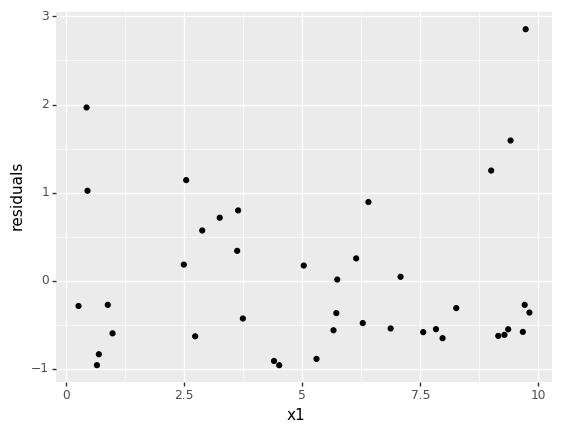

<ggplot: (8732960517993)>

In [9]:
fig4=(p9.ggplot(p9.aes(x='x1',y='residuals'),data=data_to_learn)
      +p9.geom_point())
fig4

#### Wykresy residuow wraz z dwoma poprzednimi wykresami wskazuja, ze prawdopodobnie dokladniejszy model regresji otrzymamy na podstawie zmiennej x2, bez zmiennej x1. 

In [10]:
data_to_predict['y_pred'] = model.predict(data_to_predict[['x1','x2']])
print(data_to_predict)

     y    x1     x2     y_pred
40 NaN  9.87  10.43  14.812484
41 NaN  9.99  15.72  19.142865
42 NaN  8.39   0.35   5.916816
43 NaN  0.80  10.91  10.530475
44 NaN  9.58  15.82  19.012485
45 NaN  4.82  11.90  13.398863
46 NaN  2.97   2.46   4.829144
47 NaN  8.80   4.09   9.145767
48 NaN  6.07   1.80   5.892489
49 NaN  0.19  13.54  12.338639
50 NaN  4.19  19.13  18.908561
51 NaN  5.39  14.84  16.064649
52 NaN  6.58   5.28   8.963122
53 NaN  2.36  15.42  14.972786
54 NaN  2.37   4.12   5.859744
55 NaN  1.52   6.54   7.374900
56 NaN  2.07   2.67   4.535267
57 NaN  6.70  12.85  15.133280
58 NaN  2.02   8.36   9.100899
59 NaN  9.63  12.16  16.084900


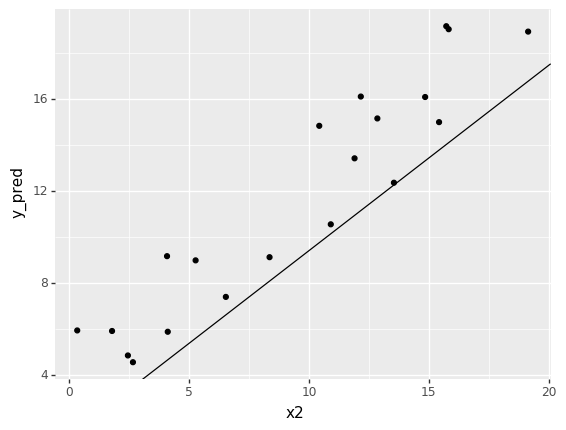

<ggplot: (8732960450281)>

In [11]:
fig5=(p9.ggplot(p9.aes(x='x2',y='y_pred'),data=data_to_predict)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome['Intercept'],slope=outcome['x2'])))
fig5

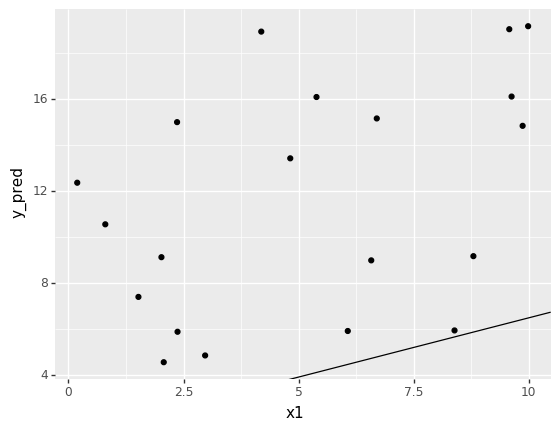

<ggplot: (8732960388581)>

In [12]:
fig6=(p9.ggplot(p9.aes(x='x1',y='y_pred'),data=data_to_predict)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome['Intercept'],slope=outcome['x1'])))
fig6

## Model regresji tylko na podstawie zmiennej x2:

In [13]:
model_2 = smf.ols('y ~ x2', data=data_to_learn).fit()
outcome_2 = model_2.params
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     275.2
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           5.38e-19
Time:                        00:34:24   Log-Likelihood:                -80.617
No. Observations:                  40   AIC:                             165.2
Df Residuals:                      38   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7853      0.660      5.732      0.000       2.448       5.122
x2             0.8322      0.050     16.589      0.000       0.731       0.934
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.221
Skew:                           0.600   Prob(JB):                        0.200
Kurtosis:                       3.701   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
data_to_learn['y_pred_2']=model_2.predict()
data_to_learn['residuals_2']=data_to_learn['y']-data_to_learn['y_pred_2']

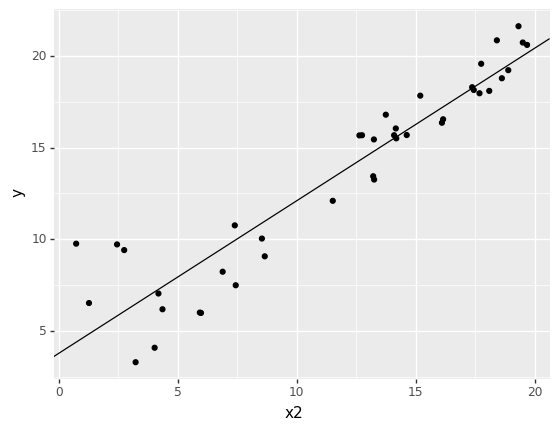

<ggplot: (8732960346861)>

In [15]:
fig7=(p9.ggplot(p9.aes(x='x2',y='y'),data=data_to_learn)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome_2['Intercept'],slope=outcome_2['x2'])))
fig7

#### Dopasowanie drugiego modelu wyglada znacznie lepiej

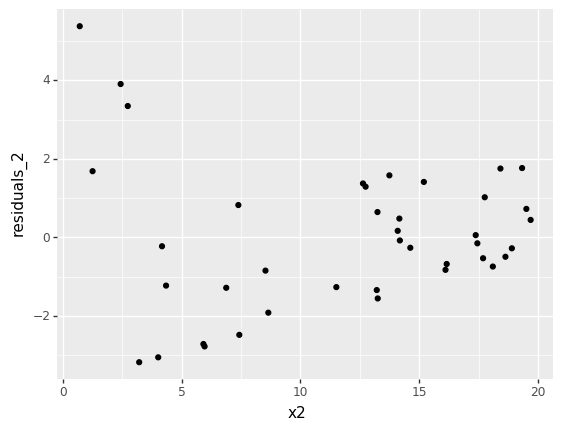

<ggplot: (8732960317337)>

In [16]:
fig8 =(p9.ggplot(p9.aes(x='x2',y='residuals_2'),data=data_to_learn)
      +p9.geom_point())
fig8

In [17]:
data_to_predict['y_pred_2'] = model_2.predict(X2)
print(data_to_predict)

     y    x1     x2     y_pred   y_pred_2
40 NaN  9.87  10.43  14.812484  12.465489
41 NaN  9.99  15.72  19.142865  16.867993
42 NaN  8.39   0.35   5.916816   4.076598
43 NaN  0.80  10.91  10.530475  12.864960
44 NaN  9.58  15.82  19.012485  16.951216
45 NaN  4.82  11.90  13.398863  13.688869
46 NaN  2.97   2.46   4.829144   5.832606
47 NaN  8.80   4.09   9.145767   7.189143
48 NaN  6.07   1.80   5.892489   5.283334
49 NaN  0.19  13.54  12.338639  15.053729
50 NaN  4.19  19.13  18.908561  19.705902
51 NaN  5.39  14.84  16.064649  16.135629
52 NaN  6.58   5.28   8.963122   8.179498
53 NaN  2.36  15.42  14.972786  16.618323
54 NaN  2.37   4.12   5.859744   7.214110
55 NaN  1.52   6.54   7.374900   9.228110
56 NaN  2.07   2.67   4.535267   6.007375
57 NaN  6.70  12.85  15.133280  14.479489
58 NaN  2.02   8.36   9.100899  10.742771
59 NaN  9.63  12.16  16.084900  13.905250
